In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [6]:
train.select_dtypes(exclude=[np.number]).count()

Series([], dtype: int64)

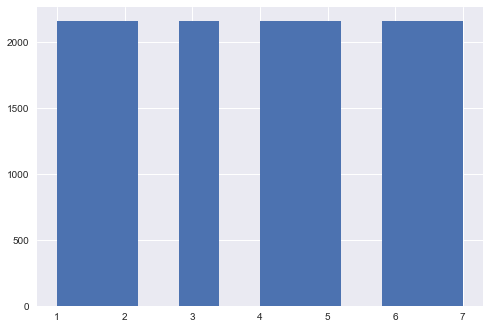

In [7]:
plt.hist(train['Cover_Type'])
plt.show()

In [8]:
for i in range(1,7):
    print(train[train['Cover_Type']==i].count())

Id                                    2160
Elevation                             2160
Aspect                                2160
Slope                                 2160
Horizontal_Distance_To_Hydrology      2160
Vertical_Distance_To_Hydrology        2160
Horizontal_Distance_To_Roadways       2160
Hillshade_9am                         2160
Hillshade_Noon                        2160
Hillshade_3pm                         2160
Horizontal_Distance_To_Fire_Points    2160
Wilderness_Area1                      2160
Wilderness_Area2                      2160
Wilderness_Area3                      2160
Wilderness_Area4                      2160
Soil_Type1                            2160
Soil_Type2                            2160
Soil_Type3                            2160
Soil_Type4                            2160
Soil_Type5                            2160
Soil_Type6                            2160
Soil_Type7                            2160
Soil_Type8                            2160
Soil_Type9 

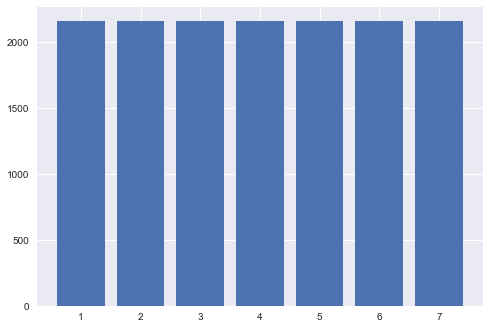

In [9]:
bar = train['Cover_Type'].value_counts()
plt.bar(bar.index,bar.values)
plt.show()

In [10]:
corr = train.corr()
corr['Cover_Type'].sort_values(ascending=False)[:10]

Cover_Type          1.000000
Soil_Type38         0.257810
Soil_Type39         0.240384
Soil_Type40         0.205851
Soil_Type10         0.128972
Wilderness_Area3    0.122146
Soil_Type35         0.114327
Id                  0.108363
Slope               0.087722
Wilderness_Area4    0.075774
Name: Cover_Type, dtype: float64

In [11]:
group = train.groupby(['Soil_Type38','Cover_Type']).size().reset_index().pivot(index='Cover_Type',columns='Soil_Type38',values=0)
group

Soil_Type38,0,1
Cover_Type,,
1,2080.0,80.0
2,2153.0,7.0
3,2160.0,NaN
4,2160.0,NaN
5,2160.0,NaN
6,2160.0,NaN
7,1519.0,641.0


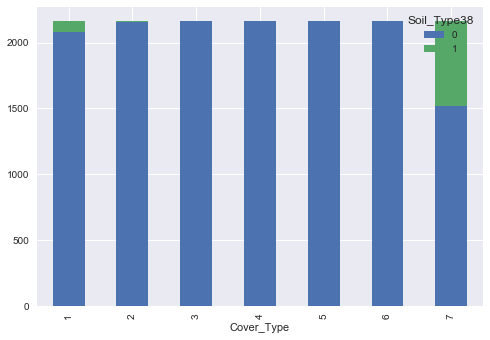

In [12]:
group.plot(kind='bar',stacked=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel

In [14]:
X = train.drop('Cover_Type',axis=1)
y = train['Cover_Type']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [16]:
rfc = RandomForestClassifier()

In [17]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
preds = rfc.predict(X_test)

In [19]:
accuracy_score(y_test,preds)

0.82605820105820105

In [20]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=None)

In [21]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [22]:
selected = X.columns[(sel.get_support())]

In [23]:
print(selected)

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area4', 'Soil_Type3', 'Soil_Type10'],
      dtype='object')


In [24]:
X = train[selected].drop('Id',axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [26]:
rfc_new = RandomForestClassifier()

In [27]:
rfc_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
new_preds = rfc_new.predict(X_test)

In [29]:
accuracy_score(y_test,new_preds)

0.79982363315696647

In [30]:
X = train.drop(['Id','Cover_Type'],axis=1)
y = train['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=101)

In [31]:
import xgboost as xgb

In [32]:
xg_class = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=1000, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

In [33]:
xg_class.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [34]:
xgb_preds = xg_class.predict(X_test)

In [35]:
xgb_preds

array([5, 5, 1, ..., 6, 3, 3])

In [36]:
accuracy_score(y_test,xgb_preds)

0.8070987654320988

In [37]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [39]:
test_preds = xg_class.predict((test.drop('Id',axis=1)).values)

In [ ]:
len(test.columns)

In [45]:
len(train.columns)

56

In [50]:
rfc_preds_final = rfc.predict(test)

In [51]:
test_ids = test['Id']
submission = pd.DataFrame({'Id':test_ids,'Cover_Type':rfc_preds_final})

In [52]:
submission.to_csv('submission.csv',index=False)